In [1]:
!pip install yfinance


In [2]:
!pip install matplotlib


In [3]:
import yfinance as yf
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period = "max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-30 00:00:00-04:00,5726.520020,5765.140137,5703.529785,5762.479980,4425730000,0.0,0.0
2024-10-01 00:00:00-04:00,5757.729980,5757.729980,5681.279785,5708.750000,4025180000,0.0,0.0
2024-10-02 00:00:00-04:00,5698.140137,5719.629883,5674.000000,5709.540039,3829050000,0.0,0.0


In [4]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-09-23 00:00:00-04:00', '2024-09-24 00:00:00-04:00',
               '2024-09-25 00:00:00-04:00', '2024-09-26 00:00:00-04:00',
               '2024-09-27 00:00:00-04:00', '2024-09-30 00:00:00-04:00',
               '2024-10-01 00:00:00-04:00', '2024-10-02 00:00:00-04:00',
               '2024-10-03 00:00:00-04:00', '2024-10-04 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24307, freq=None)

<Axes: xlabel='Date'>

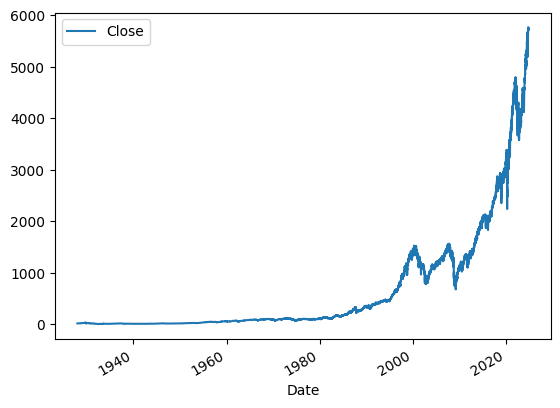

In [5]:
sp500.plot.line(y = "Close", use_index = True)

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [8]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [9]:
sp500.loc["1990-01-01":].copy()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-09-30 00:00:00-04:00,5726.520020,5765.140137,5703.529785,5762.479980,4425730000,5708.750000,0
2024-10-01 00:00:00-04:00,5757.729980,5757.729980,5681.279785,5708.750000,4025180000,5709.540039,1
2024-10-02 00:00:00-04:00,5698.140137,5719.629883,5674.000000,5709.540039,3829050000,5699.939941,0


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [11]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [12]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [13]:
precision_score(test["Target"], preds)

np.float64(1.0)

<Axes: xlabel='Date'>

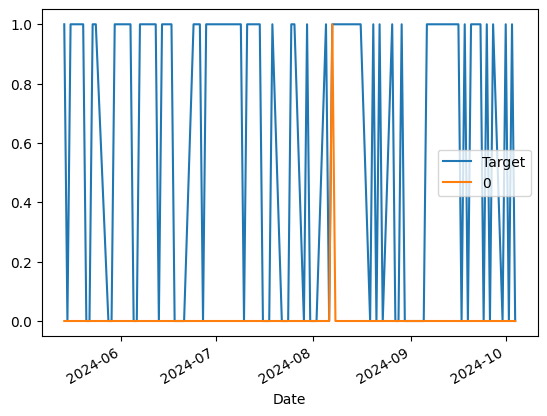

In [14]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [15]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)

    return combined

In [16]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages ["Close"]
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]

In [ ]:
sp500 = sp500.dropna()
sp500

In [ ]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)

    return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])